## Importing libraries

In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import datetime
import matplotlib.pyplot as plt

## Reading data

In [2]:
dataset=pd.read_csv('/content/TCS.csv',index_col=['Date'],parse_dates=True)
dataset_new=pd.read_csv('/content/TCS.New.csv',index_col=['Date'],parse_dates=True)

In [ ]:
dataset_new.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,2679.000000,2735.899902,2624.449951,2726.800049,2721.620850,3605017
2020-12-02,2719.000000,2754.699951,2702.449951,2749.550049,2744.327637,2509032
2020-12-03,2773.899902,2773.899902,2700.800049,2709.449951,2704.303711,2852548
2020-12-04,2710.800049,2738.850098,2699.000000,2727.550049,2722.369385,2686527
2020-12-07,2715.000000,2744.000000,2706.149902,2737.699951,2732.500000,1996400


In [5]:
dataset.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


In [6]:
dataset.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [7]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 69 entries, 2020-12-01 to 2021-03-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       69 non-null     float64
 1   High       69 non-null     float64
 2   Low        69 non-null     float64
 3   Close      69 non-null     float64
 4   Adj Close  69 non-null     float64
 5   Volume     69 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.8 KB


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4037 entries, 2004-08-25 to 2020-11-27
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Symbol              4037 non-null   object 
 1   Series              4037 non-null   object 
 2   Prev Close          4037 non-null   float64
 3   Open                4037 non-null   float64
 4   High                4037 non-null   float64
 5   Low                 4037 non-null   float64
 6   Last                4037 non-null   float64
 7   Close               4037 non-null   float64
 8   VWAP                4037 non-null   float64
 9   Volume              4037 non-null   int64  
 10  Turnover            4037 non-null   float64
 11  Trades              2354 non-null   float64
 12  Deliverable Volume  4037 non-null   int64  
 13  %Deliverble         4037 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 473.1+ KB


In [9]:
dataset.drop(['Symbol','Series','Trades','Prev Close','VWAP','Turnover','Trades','Deliverable Volume','%Deliverble','Last'],axis=1,inplace=True)

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4037 entries, 2004-08-25 to 2020-11-27
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4037 non-null   float64
 1   High    4037 non-null   float64
 2   Low     4037 non-null   float64
 3   Close   4037 non-null   float64
 4   Volume  4037 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 189.2 KB


In [11]:
dataset_new.drop(['Adj Close'],axis=1,inplace=True)

In [12]:
dataset=pd.concat([dataset,dataset_new])


## Visualizing data

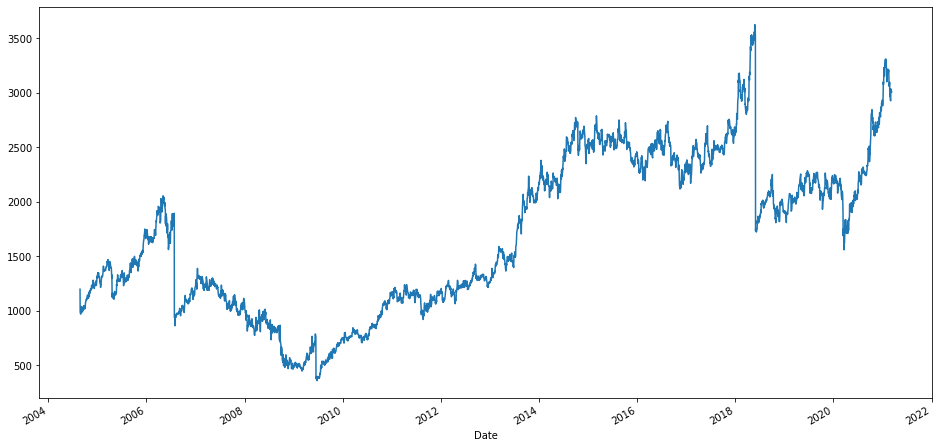

In [13]:
dataset['Open'].plot(figsize=(16,8))

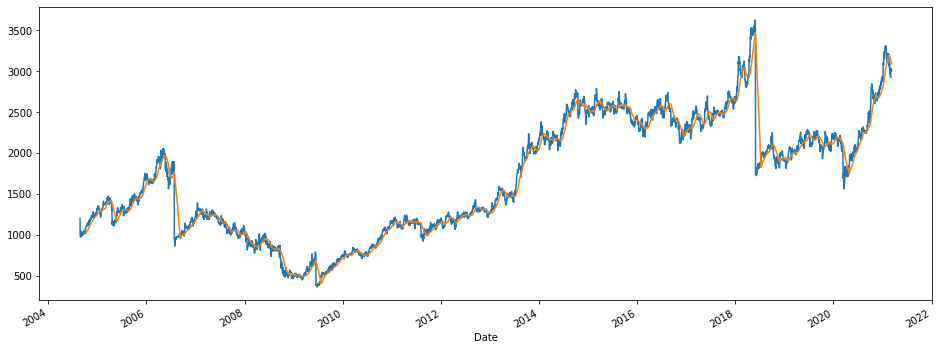

In [14]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

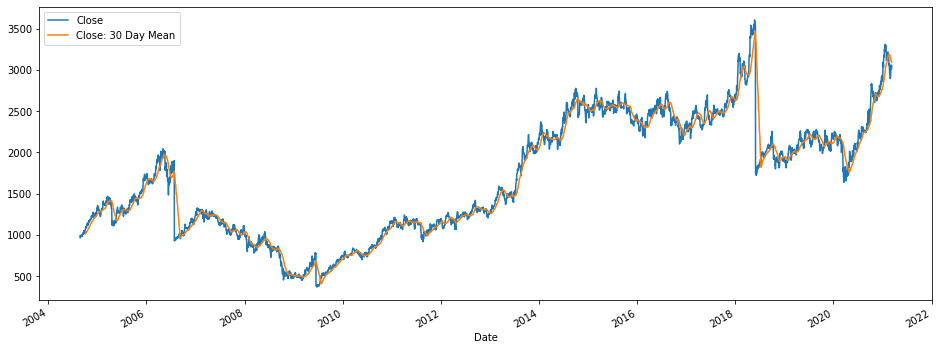

In [15]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

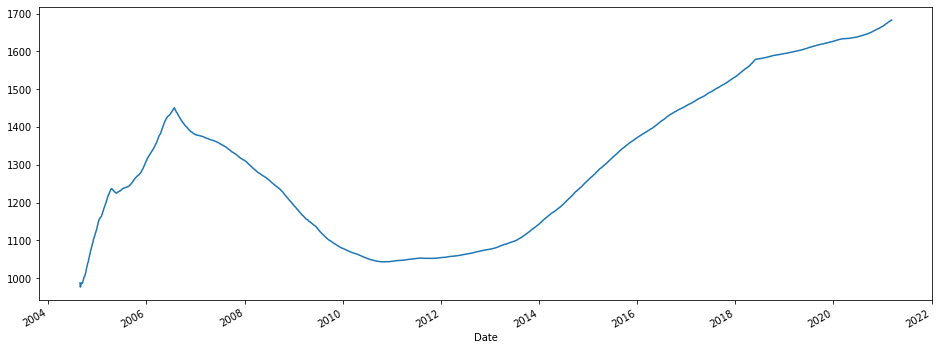

In [16]:
dataset['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

## Preprocessing data

In [17]:
training_set=dataset['Open']
training_set=pd.DataFrame(training_set)

## Normalization

In [18]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [19]:
len(training_set_scaled)

4106

## Creating training data

In [20]:
X = []
y = []
# Time stamps of 30 ticks
for i in range(30, 4106):
    X.append(training_set_scaled[i-30:i, 0])
    y.append(training_set_scaled[i, 0])
X, y = np.array(X), np.array(y)
print(y.shape)

# Reshaping
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


(4076,)


In [ ]:
X.shape

(4076, 30, 1)

## Spliting data for training and testing

In [23]:
x_train=X[:4056]
y_train=y[:4056]
x_test=X[4056:]
y_test=y[4056:]

## Inverse_transforming testing data

In [24]:
y_test=y_test.reshape(-1,1)
y_test=sc.inverse_transform(y_test)

In [25]:
y_test

array([[3185.      ],
       [3215.      ],
       [3184.199951],
       [3209.      ],
       [3150.      ],
       [3105.100098],
       [3065.      ],
       [3058.      ],
       [3096.      ],
       [2970.      ],
       [2972.      ],
       [2974.      ],
       [2960.      ],
       [2926.      ],
       [2960.      ],
       [3035.      ],
       [3023.      ],
       [3016.100098],
       [3016.      ],
       [3006.949951]])

## Importing modules

In [27]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Creating Model

In [28]:
regressor = Sequential()

In [29]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

## Fiting data to our model
We are trying to predict the stock price on every 30th day

In [30]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
127/127 [==============================] - 14s 59ms/step - loss: 0.0317
Epoch 2/100
127/127 [==============================] - 7s 58ms/step - loss: 0.0042
Epoch 3/100
127/127 [==============================] - 7s 59ms/step - loss: 0.0037
Epoch 4/100
127/127 [==============================] - 8s 59ms/step - loss: 0.0033
Epoch 5/100
127/127 [==============================] - 7s 59ms/step - loss: 0.0029
Epoch 6/100
127/127 [==============================] - 8s 61ms/step - loss: 0.0025
Epoch 7/100
127/127 [==============================] - 8s 60ms/step - loss: 0.0022
Epoch 8/100
127/127 [==============================] - 8s 60ms/step - loss: 0.0024
Epoch 9/100
127/127 [==============================] - 8s 60ms/step - loss: 0.0019
Epoch 10/100
127/127 [==============================] - 8s 60ms/step - loss: 0.0019
Epoch 11/100
127/127 [==============================] - 8s 60ms/step - loss: 0.0018
Epoch 12/100
127/127 [==============================] - 8s 61ms/step - loss: 0.0019


## Predicting the test_data

In [31]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [32]:
predicted_stock_price[:5]

array([[3128.3545],
       [3123.182 ],
       [3145.394 ],
       [3124.476 ],
       [3137.5613]], dtype=float32)

In [33]:
y_test

array([[3185.      ],
       [3215.      ],
       [3184.199951],
       [3209.      ],
       [3150.      ],
       [3105.100098],
       [3065.      ],
       [3058.      ],
       [3096.      ],
       [2970.      ],
       [2972.      ],
       [2974.      ],
       [2960.      ],
       [2926.      ],
       [2960.      ],
       [3035.      ],
       [3023.      ],
       [3016.100098],
       [3016.      ],
       [3006.949951]])

In [34]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


## Ploting the actual price vs the predicted price

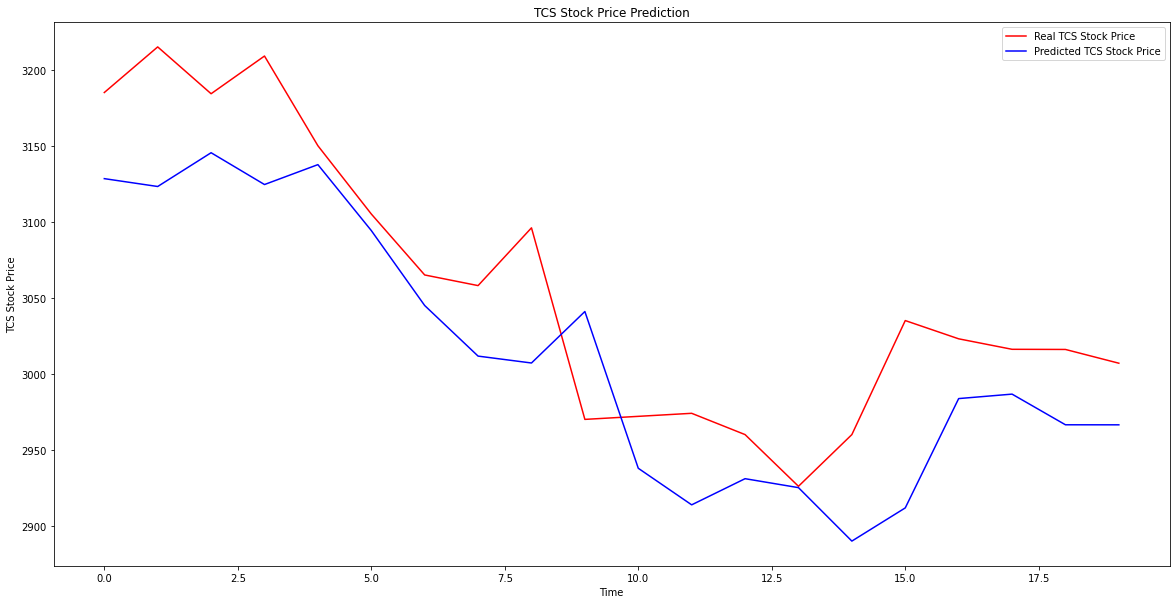

<Figure size 432x288 with 0 Axes>

In [35]:
plt.figure(figsize=(20,10))
plt.plot(y_test, color = 'red', label = 'Real TCS Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()
plt.savefig('Stock.png')